## Setup

In [2]:
import pandas as pd
import zipfile
import seaborn as sns
#import utils
import glob
import numpy as np
import matplotlib.pyplot as plt
!pip install altair
import altair as alt
import os

## Data Collection 1

In [9]:
#changing directory
os.chdir("desktop/Data science project/Cancer profiles")
#os.chdir("Cancer profiles")
#os.chdir("Noncancer profiles")
#os.chdir("All_profiles")
#os.chdir("mutated genes")
#os.chdir("..")
#os.chdir("cases")
os.getcwd()

'C:\\Users\\User\\desktop\\Data science project\\Cancer profiles'

## Data Collection 1.1 Cancer Patient's Profile

In [10]:
#all Profiles
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "lung_cancer_cases.csv", index=False)

In [11]:
#all_Profiles
import time
start = time.time()
lung_cancer_cases = pd.read_csv("lung_cancer_cases.csv")
end = time.time()
print(end-start)
lung_cancer_cases = lung_cancer_cases.drop_duplicates(ignore_index = True)

lung_cancer_cases

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0.7306509017944336


,symbol,Patients,BRAF,PTPRB,ABL2,ARHGAP26,ERCC5,PDGFRA,IL21R,ALK,...,FEV,SDHAF2,LHFP,CEBPA,CHIC2,RAP1GDS1,CDK6,PTK6,Is_lung_cancer,Unnamed: 1
0,BRAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PTPRB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABL2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARHGAP26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ERCC5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,NaN,patient_197,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
765,NaN,patient_198,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
766,NaN,patient_199,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
767,NaN,patient_200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [185]:
for i in range(1,201):
    lung_cancer_cases.insert(loc= i, column='patient_' + str(i), value= 0)
    

lung_cancer_cases = lung_cancer_cases.transpose()
lung_cancer_cases['Is_lung_cancer'] = 1
for i in range(101,201):
    lung_cancer_cases.iloc[i,568] = 0

lung_cancer_cases

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,Is_lung_cancer
symbol,BRAF,PTPRB,ABL2,ARHGAP26,ERCC5,PDGFRA,IL21R,ALK,FGFR4,BRIP1,...,POU2AF1,FEV,SDHAF2,LHFP,CEBPA,CHIC2,RAP1GDS1,CDK6,PTK6,1
patient_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
patient_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
patient_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
patient_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
patient_196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
patient_197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
patient_198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
patient_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
#lung cancer_patients
import time
start = time.time()
patients = []
x = 0
patient_1 = pd.read_csv("patient_1.csv")
patient_2 = pd.read_csv("patient_2.csv")
patient_3 = pd.read_csv("patient_3.csv")
patient_4 = pd.read_csv("patient_4.csv")
patient_5 = pd.read_csv("patient_5.csv")
patient_6 = pd.read_csv("patient_6.csv")
patient_7 = pd.read_csv("patient_7.csv")
patient_8 = pd.read_csv("patient_8.csv")
patient_9 = pd.read_csv("patient_9.csv")
patient_10 = pd.read_csv("patient_10.csv")
patient_11 = pd.read_csv("patient_11.csv")
patient_12 = pd.read_csv("patient_12.csv")
patient_13 = pd.read_csv("patient_13.csv")
patient_14 = pd.read_csv("patient_14.csv")
patient_15 = pd.read_csv("patient_15.csv")
patient_16 = pd.read_csv("patient_16.csv")
patient_17 = pd.read_csv("patient_17.csv")
patient_18 = pd.read_csv("patient_18.csv")
patient_19 = pd.read_csv("patient_19.csv")
patient_20 = pd.read_csv("patient_20.csv")
patient_21 = pd.read_csv("patient_21.csv")
patient_22 = pd.read_csv("patient_22.csv")
patient_23 = pd.read_csv("patient_23.csv")
patient_24 = pd.read_csv("patient_24.csv")
patient_25 = pd.read_csv("patient_25.csv")
patient_26 = pd.read_csv("patient_26.csv")
patient_27 = pd.read_csv("patient_27.csv")
patient_28 = pd.read_csv("patient_28.csv")
patient_29 = pd.read_csv("patient_29.csv")
patient_30 = pd.read_csv("patient_30.csv")
patient_31 = pd.read_csv("patient_31.csv")
patient_32 = pd.read_csv("patient_32.csv")
patient_33 = pd.read_csv("patient_33.csv")
patient_34 = pd.read_csv("patient_34.csv")
patient_35 = pd.read_csv("patient_35.csv")
patient_36 = pd.read_csv("patient_36.csv")
patient_37 = pd.read_csv("patient_37.csv")
patient_38 = pd.read_csv("patient_38.csv")
patient_39 = pd.read_csv("patient_39.csv")
patient_40 = pd.read_csv("patient_40.csv")
patient_41 = pd.read_csv("patient_41.csv")
patient_42 = pd.read_csv("patient_42.csv")
patient_43 = pd.read_csv("patient_43.csv")
patient_44 = pd.read_csv("patient_44.csv")
patient_45 = pd.read_csv("patient_45.csv")
patient_46 = pd.read_csv("patient_46.csv")
patient_47 = pd.read_csv("patient_47.csv")
patient_48 = pd.read_csv("patient_48.csv")
patient_49 = pd.read_csv("patient_49.csv")
patient_50 = pd.read_csv("patient_50.csv")
patient_51 = pd.read_csv("patient_51.csv")
patient_52 = pd.read_csv("patient_52.csv")
patient_53 = pd.read_csv("patient_53.csv")
patient_54 = pd.read_csv("patient_54.csv")
patient_55 = pd.read_csv("patient_55.csv")
patient_56 = pd.read_csv("patient_56.csv")
patient_57 = pd.read_csv("patient_57.csv")
patient_58 = pd.read_csv("patient_58.csv")
patient_59 = pd.read_csv("patient_59.csv")
patient_60 = pd.read_csv("patient_60.csv")
patient_61 = pd.read_csv("patient_61.csv")
patient_62 = pd.read_csv("patient_62.csv")
patient_63 = pd.read_csv("patient_63.csv")
patient_64 = pd.read_csv("patient_64.csv")
patient_65 = pd.read_csv("patient_65.csv")
patient_66 = pd.read_csv("patient_66.csv")
patient_67 = pd.read_csv("patient_67.csv")
patient_68 = pd.read_csv("patient_68.csv")
patient_69 = pd.read_csv("patient_69.csv")
patient_70 = pd.read_csv("patient_70.csv")
patient_71 = pd.read_csv("patient_71.csv")
patient_72 = pd.read_csv("patient_72.csv")
patient_73 = pd.read_csv("patient_73.csv")
patient_74 = pd.read_csv("patient_74.csv")
patient_75 = pd.read_csv("patient_75.csv")
patient_76 = pd.read_csv("patient_76.csv")
patient_77 = pd.read_csv("patient_77.csv")
patient_78 = pd.read_csv("patient_78.csv")
patient_79 = pd.read_csv("patient_79.csv")
patient_80 = pd.read_csv("patient_80.csv")
patient_81 = pd.read_csv("patient_81.csv")
patient_82 = pd.read_csv("patient_82.csv")
patient_83 = pd.read_csv("patient_83.csv")
patient_84 = pd.read_csv("patient_84.csv")
patient_85 = pd.read_csv("patient_85.csv")
patient_86 = pd.read_csv("patient_86.csv")
patient_87 = pd.read_csv("patient_87.csv")
patient_88 = pd.read_csv("patient_88.csv")
patient_89 = pd.read_csv("patient_89.csv")
patient_90 = pd.read_csv("patient_90.csv")
patient_91 = pd.read_csv("patient_91.csv")
patient_92 = pd.read_csv("patient_92.csv")
patient_93 = pd.read_csv("patient_93.csv")
patient_94 = pd.read_csv("patient_94.csv")
patient_95 = pd.read_csv("patient_95.csv")
patient_96 = pd.read_csv("patient_96.csv")
patient_97 = pd.read_csv("patient_97.csv")
patient_98 = pd.read_csv("patient_98.csv")
patient_99 = pd.read_csv("patient_99.csv")
patient_100 = pd.read_csv("patient_100.csv")
patient_101 = pd.read_csv("patient_101.csv")
patient_102 = pd.read_csv("patient_102.csv")
patient_103 = pd.read_csv("patient_103.csv")
patient_104 = pd.read_csv("patient_104.csv")
patient_105 = pd.read_csv("patient_105.csv")
patient_106 = pd.read_csv("patient_106.csv")
patient_107 = pd.read_csv("patient_107.csv")
patient_108 = pd.read_csv("patient_108.csv")
patient_109 = pd.read_csv("patient_109.csv")
patient_110 = pd.read_csv("patient_110.csv")
patient_111 = pd.read_csv("patient_111.csv")
patient_112 = pd.read_csv("patient_112.csv")
patient_113 = pd.read_csv("patient_113.csv")
patient_114 = pd.read_csv("patient_114.csv")
patient_115 = pd.read_csv("patient_115.csv")
patient_116 = pd.read_csv("patient_116.csv")
patient_117 = pd.read_csv("patient_117.csv")
patient_118 = pd.read_csv("patient_118.csv")
patient_119 = pd.read_csv("patient_119.csv")
patient_120 = pd.read_csv("patient_120.csv")
patient_121 = pd.read_csv("patient_121.csv")
patient_122 = pd.read_csv("patient_122.csv")
patient_123 = pd.read_csv("patient_123.csv")
patient_124 = pd.read_csv("patient_124.csv")
patient_125 = pd.read_csv("patient_125.csv")
patient_126 = pd.read_csv("patient_126.csv")
patient_127 = pd.read_csv("patient_127.csv")
patient_128 = pd.read_csv("patient_128.csv")
patient_129 = pd.read_csv("patient_129.csv")
patient_130 = pd.read_csv("patient_130.csv")
patient_131 = pd.read_csv("patient_131.csv")
patient_132 = pd.read_csv("patient_132.csv")
patient_133 = pd.read_csv("patient_133.csv")
patient_134 = pd.read_csv("patient_134.csv")
patient_135 = pd.read_csv("patient_135.csv")
patient_136 = pd.read_csv("patient_136.csv")
patient_137 = pd.read_csv("patient_137.csv")
patient_138 = pd.read_csv("patient_138.csv")
patient_139 = pd.read_csv("patient_139.csv")
patient_140 = pd.read_csv("patient_140.csv")
patient_141 = pd.read_csv("patient_141.csv")
patient_142 = pd.read_csv("patient_142.csv")
patient_143 = pd.read_csv("patient_143.csv")
patient_144 = pd.read_csv("patient_144.csv")
patient_145 = pd.read_csv("patient_145.csv")
patient_146 = pd.read_csv("patient_146.csv")
patient_147 = pd.read_csv("patient_147.csv")
patient_148 = pd.read_csv("patient_148.csv")
patient_149 = pd.read_csv("patient_149.csv")
patient_150 = pd.read_csv("patient_150.csv")
patient_151 = pd.read_csv("patient_151.csv")
patient_152 = pd.read_csv("patient_152.csv")
patient_153 = pd.read_csv("patient_153.csv")
patient_154 = pd.read_csv("patient_154.csv")
patient_155 = pd.read_csv("patient_155.csv")
patient_156 = pd.read_csv("patient_156.csv")
patient_157 = pd.read_csv("patient_157.csv")
patient_158 = pd.read_csv("patient_158.csv")
patient_159 = pd.read_csv("patient_159.csv")
patient_160 = pd.read_csv("patient_160.csv")
patient_161 = pd.read_csv("patient_161.csv")
patient_162 = pd.read_csv("patient_162.csv")
patient_163 = pd.read_csv("patient_163.csv")
patient_164 = pd.read_csv("patient_164.csv")
patient_165 = pd.read_csv("patient_165.csv")
patient_166 = pd.read_csv("patient_166.csv")
patient_167 = pd.read_csv("patient_167.csv")
patient_168 = pd.read_csv("patient_168.csv")
patient_169 = pd.read_csv("patient_169.csv")
patient_170 = pd.read_csv("patient_170.csv")
patient_171 = pd.read_csv("patient_171.csv")
patient_172 = pd.read_csv("patient_172.csv")
patient_173 = pd.read_csv("patient_173.csv")
patient_174 = pd.read_csv("patient_174.csv")
patient_175 = pd.read_csv("patient_175.csv")
patient_176 = pd.read_csv("patient_176.csv")
patient_177 = pd.read_csv("patient_177.csv")
patient_178 = pd.read_csv("patient_178.csv")
patient_179 = pd.read_csv("patient_179.csv")
patient_180 = pd.read_csv("patient_180.csv")
patient_181 = pd.read_csv("patient_181.csv")
patient_182 = pd.read_csv("patient_182.csv")
patient_183 = pd.read_csv("patient_183.csv")
patient_184 = pd.read_csv("patient_184.csv")
patient_185 = pd.read_csv("patient_185.csv")
patient_186 = pd.read_csv("patient_186.csv")
patient_187 = pd.read_csv("patient_187.csv")
patient_188 = pd.read_csv("patient_188.csv")
patient_189 = pd.read_csv("patient_189.csv")
patient_190 = pd.read_csv("patient_190.csv")
patient_191 = pd.read_csv("patient_191.csv")
patient_192 = pd.read_csv("patient_192.csv")
patient_193 = pd.read_csv("patient_193.csv")
patient_194 = pd.read_csv("patient_194.csv")
patient_195 = pd.read_csv("patient_195.csv")
patient_196 = pd.read_csv("patient_196.csv")
patient_197 = pd.read_csv("patient_197.csv")
patient_198 = pd.read_csv("patient_198.csv")
patient_199 = pd.read_csv("patient_199.csv")
patient_200 = pd.read_csv("patient_200.csv")


patients.extend((x,patient_1,patient_2,patient_3,patient_4,patient_5,patient_6,
patient_7,patient_8,patient_9,patient_10, patient_11,patient_12,patient_13,
patient_14, patient_15,patient_16,patient_17,patient_18,patient_19,
patient_20,patient_21,patient_22,patient_23,patient_24,patient_25,patient_26,
patient_27,patient_28, patient_29, patient_30,patient_31,patient_32,patient_33,
patient_34,patient_35,patient_36,patient_37,patient_38,patient_39,patient_40,
patient_41,patient_42,patient_43,patient_44,patient_45,patient_46,patient_47,
patient_48,patient_49,patient_50,patient_51,patient_52,patient_53,patient_54,
patient_55,patient_56,patient_57,patient_58,patient_59,patient_60,
patient_61,patient_62,patient_63,patient_64,patient_65,patient_66,patient_67,
patient_68,patient_69,patient_70,patient_71,patient_72,patient_73,patient_74,
patient_75,patient_76,patient_77,patient_78,patient_79,patient_80,patient_81,
patient_82,patient_83,patient_84,patient_85,patient_86,patient_87,patient_88,
patient_89,patient_90,patient_91,patient_92,patient_93,patient_94,patient_95,
patient_96,patient_97,patient_98,patient_99,patient_100,patient_101,patient_102,
patient_103,patient_104,patient_105,patient_106,patient_107,patient_108,patient_109,
patient_110,patient_111,patient_112,patient_113,patient_114,patient_115,patient_116,
patient_117,patient_118,patient_119,patient_120,patient_121,patient_122,patient_123,
patient_124,patient_125,patient_126,patient_127,patient_128,patient_129,patient_130,
patient_131,patient_132,patient_133,patient_134,patient_135,patient_136,patient_137,                 
patient_138,patient_139,patient_140,patient_141,patient_142,patient_143,patient_144,
patient_145,patient_146,patient_147,patient_148,patient_149,patient_150,patient_151,
patient_152,patient_153,patient_154,patient_155,patient_156,patient_157,patient_158,
patient_159,patient_160,patient_161,patient_162,patient_163,patient_164,patient_165,
patient_166,patient_167,patient_168,patient_169,patient_170,patient_171,patient_172,
patient_173,patient_174,patient_175,patient_176,patient_177,patient_178,patient_179,
patient_180,patient_181,patient_182,patient_183,patient_184,patient_185,patient_186,
patient_187,patient_188,patient_189,patient_190,patient_191,patient_192,patient_193,
patient_194,patient_195,patient_196,patient_197,patient_198,patient_199,patient_200))

end = time.time()
print(end-start)

0.31858348846435547


In [168]:
patients[1]

,symbol
0,BRAF
1,PTPRB
2,ABL2
3,ARHGAP26
4,ERCC5
...,...
65,PBRM1
66,NOTCH2
67,TP53
68,PTPN13


In [187]:
for i in range(1,201):
    for x in range(0,568):
        for j in range(0,len(patients[i].index)):
            if lung_cancer_cases.iloc[0, x] == patients[i].iloc[j, 0]: 
                lung_cancer_cases.iloc[i,x] = 1
            

lung_cancer_cases

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,Is_lung_cancer
symbol,BRAF,PTPRB,ABL2,ARHGAP26,ERCC5,PDGFRA,IL21R,ALK,FGFR4,BRIP1,...,POU2AF1,FEV,SDHAF2,LHFP,CEBPA,CHIC2,RAP1GDS1,CDK6,PTK6,1
patient_1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
patient_2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
patient_3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
patient_4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
patient_196,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
patient_197,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
patient_198,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
patient_199,1,1,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [188]:
lung_cancer_cases.to_csv('lung_cancer_final.csv')

## Data Collection: Cases 1.2

In [356]:
#CASES
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "all_cases.csv", index=False)

In [357]:
os.listdir()

['all_cases.csv',
 'case100.csv',
 'case1000.csv',
 'case200.csv',
 'case300.csv',
 'case400.csv',
 'case500.csv',
 'case600.csv',
 'case700.csv',
 'case800.csv',
 'case900.csv']

In [358]:
from utils import head
head('all_cases.csv',4)

['Case ID,Primary Site,Gender,# Genes,Disease Type,Age at diagnosis,Days to death,Vital Status,Primary Diagnosis,Ethnicity,Race\n',
 'TCGA-18-3409,Bronchus and lung,Male,114,Squamous Cell Neoplasms,74 years 126 days,--,Alive,Basaloid squamous cell carcinoma,not hispanic or latino,white\n',
 'TCGA-17-Z031,Bronchus and lung,--,87,Adenomas and Adenocarcinomas,--,--,,--,--,--\n',
 'TCGA-90-A4ED,Bronchus and lung,Male,84,Squamous Cell Neoplasms,69 years 251 days,--,Alive,"Squamous cell carcinoma, NOS",not hispanic or latino,white\n']

In [359]:
#Cases data
import time
start = time.time()
lung_cancer_patients = pd.read_csv("all_cases.csv"
end = time.time()
print(end-start)
lung_cancer_patients

0.009311676025390625


,Case ID,Primary Site,Gender,# Genes,Disease Type,Age at diagnosis,Days to death,Vital Status,Primary Diagnosis,Ethnicity,Race
0,TCGA-18-3409,Bronchus and lung,Male,114,Squamous Cell Neoplasms,74 years 126 days,--,Alive,Basaloid squamous cell carcinoma,not hispanic or latino,white
1,TCGA-17-Z031,Bronchus and lung,--,87,Adenomas and Adenocarcinomas,--,--,NaN,--,--,--
2,TCGA-90-A4ED,Bronchus and lung,Male,84,Squamous Cell Neoplasms,69 years 251 days,--,Alive,"Squamous cell carcinoma, NOS",not hispanic or latino,white
3,TCGA-21-1079,Bronchus and lung,Male,84,Squamous Cell Neoplasms,71 years 244 days,2 years 235 days,Dead,"Squamous cell carcinoma, NOS",not hispanic or latino,white
4,TCGA-86-A4JF,Bronchus and lung,Male,79,Adenomas and Adenocarcinomas,56 years 37 days,2 years 7 days,Dead,"Adenocarcinoma, NOS",not hispanic or latino,white
...,...,...,...,...,...,...,...,...,...,...,...
995,TCGA-91-A4BD,Bronchus and lung,Male,6,Adenomas and Adenocarcinomas,78 years 55 days,--,Alive,"Adenocarcinoma, NOS",not hispanic or latino,white
996,TCGA-56-5898,Bronchus and lung,Male,5,Squamous Cell Neoplasms,69 years 239 days,--,Alive,"Squamous cell carcinoma, NOS",not hispanic or latino,white
997,TCGA-55-6986,Bronchus and lung,Female,5,Adenomas and Adenocarcinomas,--,--,Alive,"Bronchiolo-alveolar carcinoma, non-mucinous",not reported,white
998,TCGA-34-2608,Bronchus and lung,Male,5,Squamous Cell Neoplasms,84 years 277 days,2 years 270 days,Dead,"Squamous cell carcinoma, NOS",not hispanic or latino,white


## Data Collection: Mutations 1.3

In [187]:
#MUTATIONS
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "all_mutations.csv", index=False)

In [190]:
os.listdir()

['all_mutations.csv',
 'frequently-mutated-genesinlung_100.csv',
 'frequently-mutated-genesin_lung_200.csv',
 'frequently-mutated-genes_lung300.csv',
 'frequently-mutated-genes_lung400.csv',
 'frequently-mutated-genes_lung500.csv',
 'frequently-mutated-genes_lung575.csv']

In [186]:
from utils import head
head('all_mutations.csv',4)

['Symbol,Name,Cytoband,# SSM Affected Cases in Cohort,# SSM Affected Cases Across the GDC,# CNV Gain,# CNV Loss,# Mutations\n',
 'TP53,tumor protein p53,17p13.1,"731 / 1,050 (69.62%)","4,008 / 10,202","10 / 1,008 (0.99%)","36 / 1,008 (3.57%)",414\n',
 'FAT4,FAT atypical cadherin 4,4q28.1,"209 / 1,050 (19.90%)","1,169 / 10,202","21 / 1,008 (2.08%)","54 / 1,008 (5.36%)",250\n',
 'KMT2D,lysine (K)-specific methyltransferase 2D,12q13.12,"180 / 1,050 (17.14%)","1,140 / 10,202","52 / 1,008 (5.16%)","31 / 1,008 (3.08%)",218\n']

In [473]:
#Mutations data
import time
start = time.time()
different_mutations = pd.read_csv("all_mutations.csv")
### BEGIN SOLUTION
end = time.time()
print(end-start)
different_mutations

0.0261385440826416


,Symbol,Name,Cytoband,# SSM Affected Cases in Cohort,# SSM Affected Cases Across the GDC,# CNV Gain,# CNV Loss,# Mutations
0,TP53,tumor protein p53,17p13.1,"731 / 1,050 (69.62%)","4,008 / 10,202","10 / 1,008 (0.99%)","36 / 1,008 (3.57%)",414
1,FAT4,FAT atypical cadherin 4,4q28.1,"209 / 1,050 (19.90%)","1,169 / 10,202","21 / 1,008 (2.08%)","54 / 1,008 (5.36%)",250
2,KMT2D,lysine (K)-specific methyltransferase 2D,12q13.12,"180 / 1,050 (17.14%)","1,140 / 10,202","52 / 1,008 (5.16%)","31 / 1,008 (3.08%)",218
3,KRAS,Kirsten rat sarcoma viral oncogene homolog,12p12.1,"167 / 1,050 (15.90%)","839 / 10,202","96 / 1,008 (9.52%)","14 / 1,008 (1.39%)",20
4,FAT1,FAT atypical cadherin 1,4q35.2,"152 / 1,050 (14.48%)","875 / 10,202","32 / 1,008 (3.17%)","102 / 1,008 (10.12%)",179
...,...,...,...,...,...,...,...,...
570,SOCS1,suppressor of cytokine signaling 1,16p13.13,"0 / 1,050 (0.00%)","39 / 10,202","52 / 1,008 (5.16%)","15 / 1,008 (1.49%)",0
571,HMGA1,high mobility group AT-hook 1,6p21.31,"0 / 1,050 (0.00%)","44 / 10,202","53 / 1,008 (5.26%)","39 / 1,008 (3.87%)",0
572,U2AF1,U2 small nuclear RNA auxiliary factor 1,21q22.3,"0 / 1,050 (0.00%)","35 / 10,202","31 / 1,008 (3.08%)","38 / 1,008 (3.77%)",0
573,AP002884.2,AP002884.2,11q23.1,"0 / 1,050 (0.00%)","0 / 10,202","33 / 1,008 (3.27%)","72 / 1,008 (7.14%)",0


## Data Format Description 2

## Data Format Description: Cases 2.1

In [360]:
lung_cancer_patients.info()

lung_cancer_patients = lung_cancer_patients.drop(['Days to death'],axis = 1)
lung_cancer_patients.dropna(thresh=10,inplace = True)
lung_cancer_patients.rename(columns={'# Genes' : '# of mutated genes'},inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Case ID              1000 non-null object
Primary Site         1000 non-null object
Gender               1000 non-null object
# Genes              1000 non-null int64
Disease Type         1000 non-null object
Age at diagnosis     1000 non-null object
Days to death        1000 non-null object
Vital Status         953 non-null object
Primary Diagnosis    1000 non-null object
Ethnicity            1000 non-null object
Race                 1000 non-null object
dtypes: int64(1), object(10)
memory usage: 86.1+ KB


In [361]:
lung_cancer_patients.nunique()

Case ID               953
Primary Site            1
Gender                  2
# of mutated genes     62
Disease Type            4
Age at diagnosis      879
Vital Status            2
Primary Diagnosis      18
Ethnicity               3
Race                    5
dtype: int64

In [362]:
lung_cancer_patients

,Case ID,Primary Site,Gender,# of mutated genes,Disease Type,Age at diagnosis,Vital Status,Primary Diagnosis,Ethnicity,Race
0,TCGA-18-3409,Bronchus and lung,Male,114,Squamous Cell Neoplasms,74 years 126 days,Alive,Basaloid squamous cell carcinoma,not hispanic or latino,white
2,TCGA-90-A4ED,Bronchus and lung,Male,84,Squamous Cell Neoplasms,69 years 251 days,Alive,"Squamous cell carcinoma, NOS",not hispanic or latino,white
3,TCGA-21-1079,Bronchus and lung,Male,84,Squamous Cell Neoplasms,71 years 244 days,Dead,"Squamous cell carcinoma, NOS",not hispanic or latino,white
4,TCGA-86-A4JF,Bronchus and lung,Male,79,Adenomas and Adenocarcinomas,56 years 37 days,Dead,"Adenocarcinoma, NOS",not hispanic or latino,white
5,TCGA-55-8506,Bronchus and lung,Female,77,Adenomas and Adenocarcinomas,62 years 205 days,Alive,"Adenocarcinoma, NOS",not hispanic or latino,white
...,...,...,...,...,...,...,...,...,...,...
995,TCGA-91-A4BD,Bronchus and lung,Male,6,Adenomas and Adenocarcinomas,78 years 55 days,Alive,"Adenocarcinoma, NOS",not hispanic or latino,white
996,TCGA-56-5898,Bronchus and lung,Male,5,Squamous Cell Neoplasms,69 years 239 days,Alive,"Squamous cell carcinoma, NOS",not hispanic or latino,white
997,TCGA-55-6986,Bronchus and lung,Female,5,Adenomas and Adenocarcinomas,--,Alive,"Bronchiolo-alveolar carcinoma, non-mucinous",not reported,white
998,TCGA-34-2608,Bronchus and lung,Male,5,Squamous Cell Neoplasms,84 years 277 days,Dead,"Squamous cell carcinoma, NOS",not hispanic or latino,white


## Data Format Description: Mutations 2.2

In [474]:
different_mutations.info()
different_mutations = different_mutations.drop(['# SSM Affected Cases Across the GDC'],axis = 1)

different_mutations = different_mutations[different_mutations['# Mutations'] > 0]
different_mutations['# SSM Affected Cases in Cohort'] = different_mutations['# SSM Affected Cases in Cohort'].str.replace('/','')
different_mutations['# SSM Affected Cases in Cohort'] = different_mutations['# SSM Affected Cases in Cohort'].str.replace('1,050','')

different_mutations['# SSM Affected Cases in Cohort'] = different_mutations['# SSM Affected Cases in Cohort'].str.slice(0,3).astype('int')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 8 columns):
Symbol                                 575 non-null object
Name                                   575 non-null object
Cytoband                               575 non-null object
# SSM Affected Cases in Cohort         575 non-null object
# SSM Affected Cases Across the GDC    575 non-null object
# CNV Gain                             575 non-null object
# CNV Loss                             575 non-null object
# Mutations                            575 non-null int64
dtypes: int64(1), object(7)
memory usage: 36.1+ KB


In [475]:
#CNV Gain
different_mutations['# CNV Gain'] = different_mutations['# CNV Gain'].str.replace('/','')
different_mutations['# CNV Gain'] = different_mutations['# CNV Gain'].str.replace('1,008','')

different_mutations['# CNV Gain'] = different_mutations['# CNV Gain'].str.slice(0,3).astype('int')

In [476]:
#CNV Loss
different_mutations['# CNV Loss'] = different_mutations['# CNV Loss'].str.replace('/','')
different_mutations['# CNV Loss'] = different_mutations['# CNV Loss'].str.replace('1,008','')

different_mutations['# CNV Loss'] = different_mutations['# CNV Loss'].str.slice(0,3).astype('int')

In [477]:
different_mutations.nunique()

Symbol                            570
Name                              570
Cytoband                          364
# SSM Affected Cases in Cohort    100
# CNV Gain                        148
# CNV Loss                        107
# Mutations                       102
dtype: int64

In [478]:
different_mutations

,Symbol,Name,Cytoband,# SSM Affected Cases in Cohort,# CNV Gain,# CNV Loss,# Mutations
0,TP53,tumor protein p53,17p13.1,731,10,36,414
1,FAT4,FAT atypical cadherin 4,4q28.1,209,21,54,250
2,KMT2D,lysine (K)-specific methyltransferase 2D,12q13.12,180,52,31,218
3,KRAS,Kirsten rat sarcoma viral oncogene homolog,12p12.1,167,96,14,20
4,FAT1,FAT atypical cadherin 1,4q35.2,152,32,102,179
...,...,...,...,...,...,...,...
565,CEBPA,"CCAAT/enhancer binding protein (C/EBP), alpha",19q13.11,2,140,15,2
566,LYL1,lymphoblastic leukemia associated hematopoiesi...,19p13.13,1,27,50,1
567,SRSF3,serine/arginine-rich splicing factor 3,"6p21.31, 6p21.2",1,52,28,1
568,RMI2,RecQ mediated genome instability 2,16p13.13,1,53,15,1


## Descriptive Statistics 3.0

## Descriptive Statistics: Cases 3.1

In [363]:
#stats of # of mutated genes per patient
lung_cancer_patients['# of mutated genes'].describe()

count    953.000000
mean      16.474292
std       12.359276
min        3.000000
25%        9.000000
50%       14.000000
75%       20.000000
max      114.000000
Name: # of mutated genes, dtype: float64

In [364]:
#stats of age at diagnosis and changing to int values for age at diagnosis
lung_cancer_patients.drop(lung_cancer_patients[lung_cancer_patients['Age at diagnosis'] == '--'].index, inplace = True) 

lung_cancer_patients['Age at diagnosis'] = lung_cancer_patients['Age at diagnosis'].str.slice(0,2).astype('int')
lung_cancer_patients['Age at diagnosis'].describe()

count    919.000000
mean      66.297062
std        9.340444
min       33.000000
25%       60.000000
50%       67.000000
75%       73.000000
max       90.000000
Name: Age at diagnosis, dtype: float64

Text(0, 0.5, 'Number of Patients')

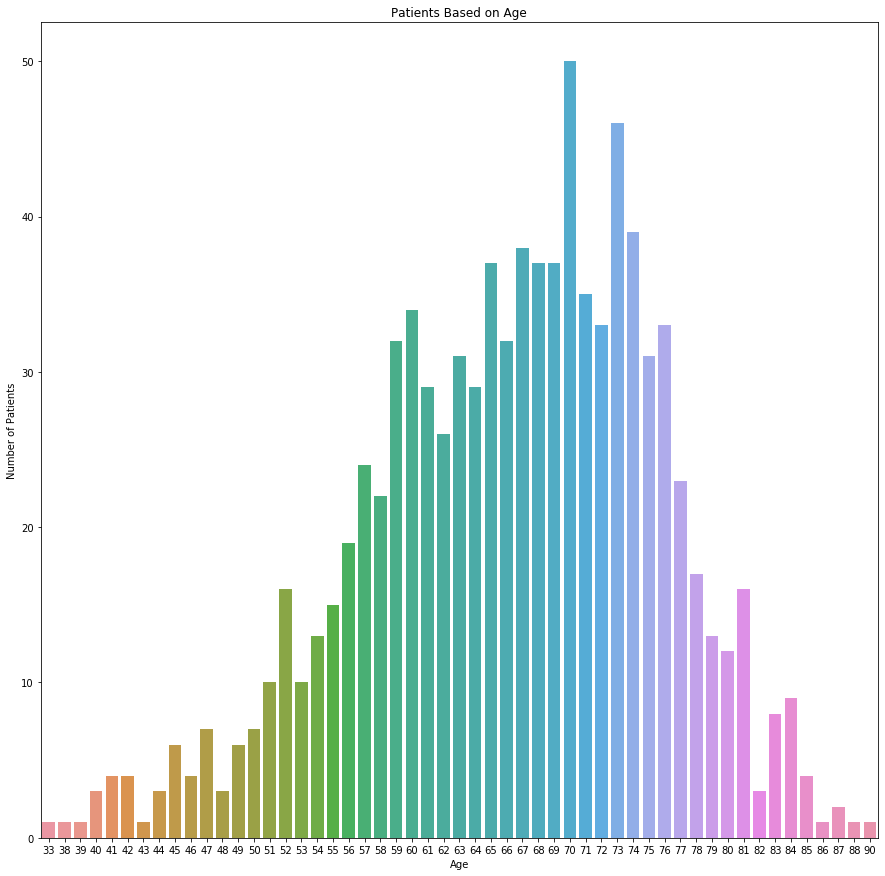

In [365]:
plt.figure(figsize=(15,15))

ax = sns.countplot(x = 'Age at diagnosis' ,data= lung_cancer_patients)
ax.set_title("Patients Based on Age")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients with the Same Amount of Mutated Genes')

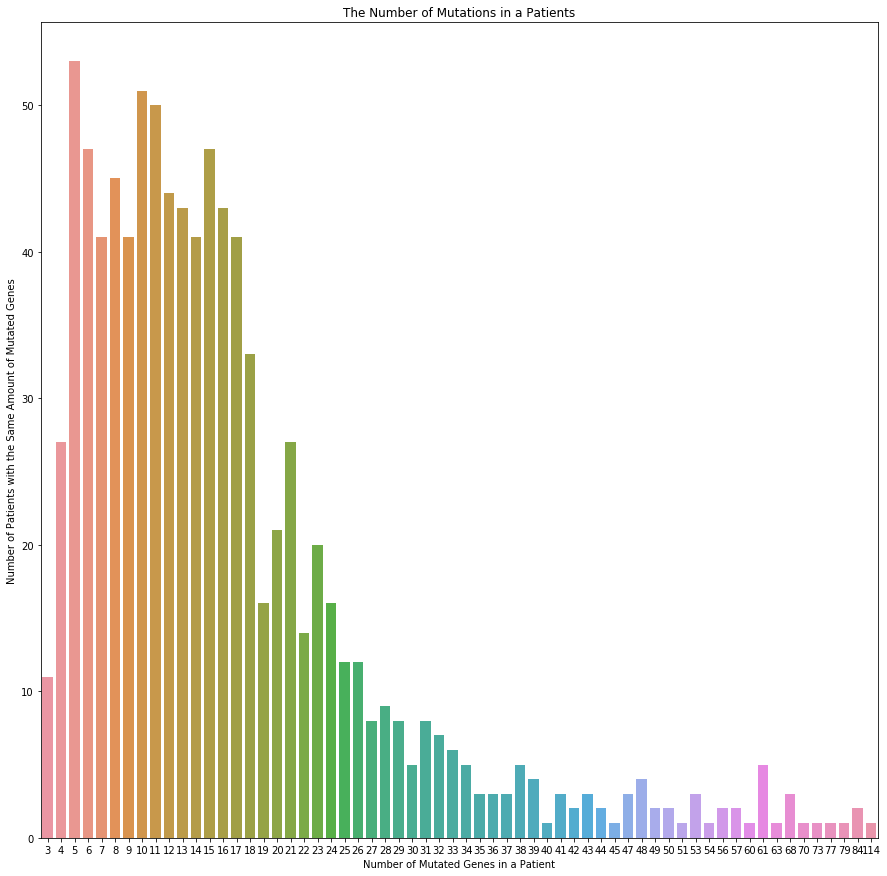

In [366]:
plt.figure(figsize=(15,15))

ax = sns.countplot(x = '# of mutated genes' ,data= lung_cancer_patients)
ax.set_title("The Number of Mutations in a Patients")
ax.set_xlabel("Number of Mutated Genes in a Patient")
ax.set_ylabel("Number of Patients with the Same Amount of Mutated Genes")

Text(0, 0.5, 'Number of Patients')

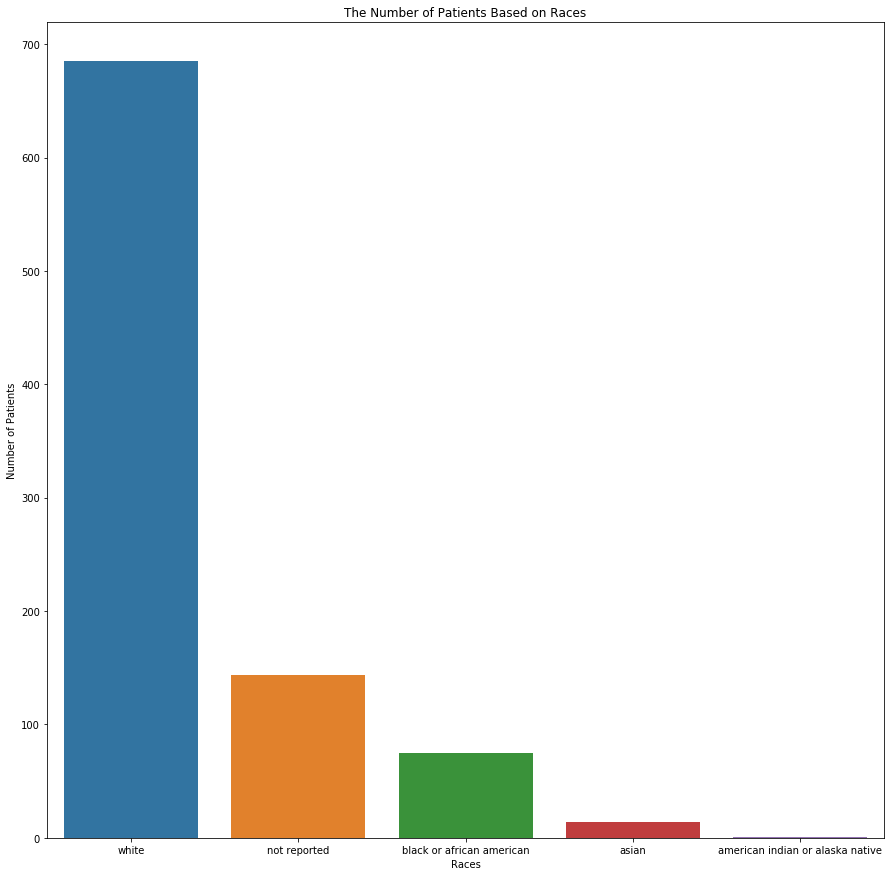

In [367]:
#Patients by Race
plt.figure(figsize=(15,15))

ax = sns.countplot(x = 'Race' ,data= lung_cancer_patients)
ax.set_title("The Number of Patients Based on Races")
ax.set_xlabel("Races")
ax.set_ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients')

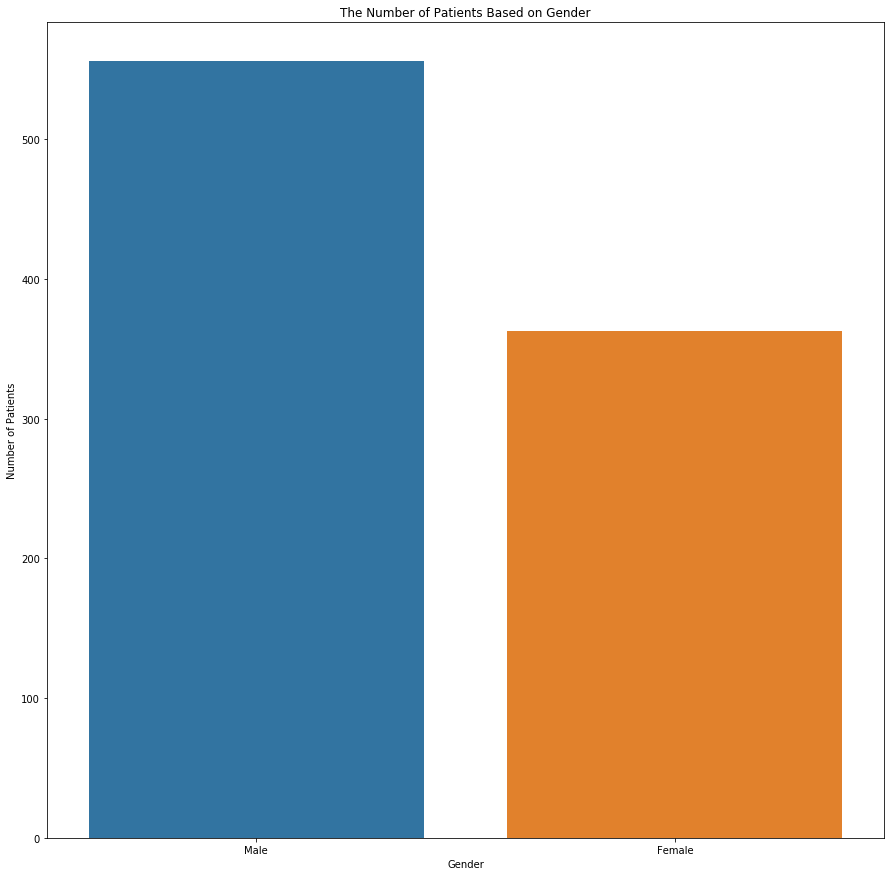

In [273]:
plt.figure(figsize=(15,15))

ax = sns.countplot(x = 'Gender' ,data= lung_cancer_patients)
ax.set_title("The Number of Patients Based on Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients')

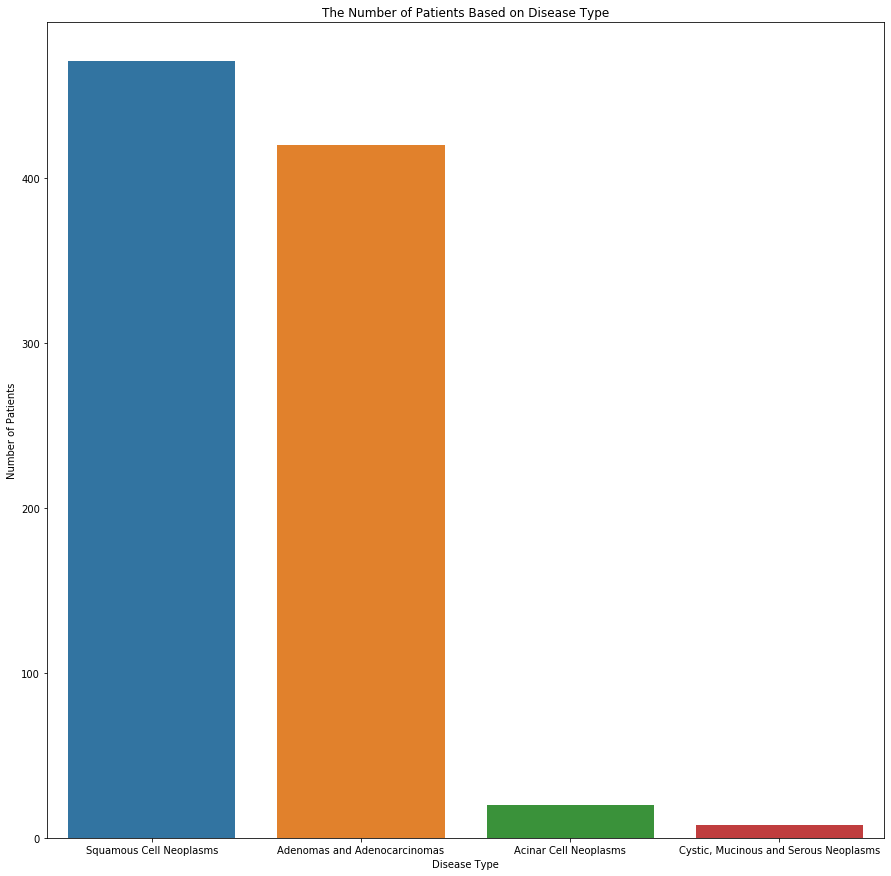

In [368]:
#Patients by disease type
plt.figure(figsize=(15,15))

ax = sns.countplot(x = 'Disease Type' ,data= lung_cancer_patients)
ax.set_title("The Number of Patients Based on Disease Type")
ax.set_xlabel("Disease Type")
ax.set_ylabel("Number of Patients")

Text(0, 0.5, 'Number of Patients')

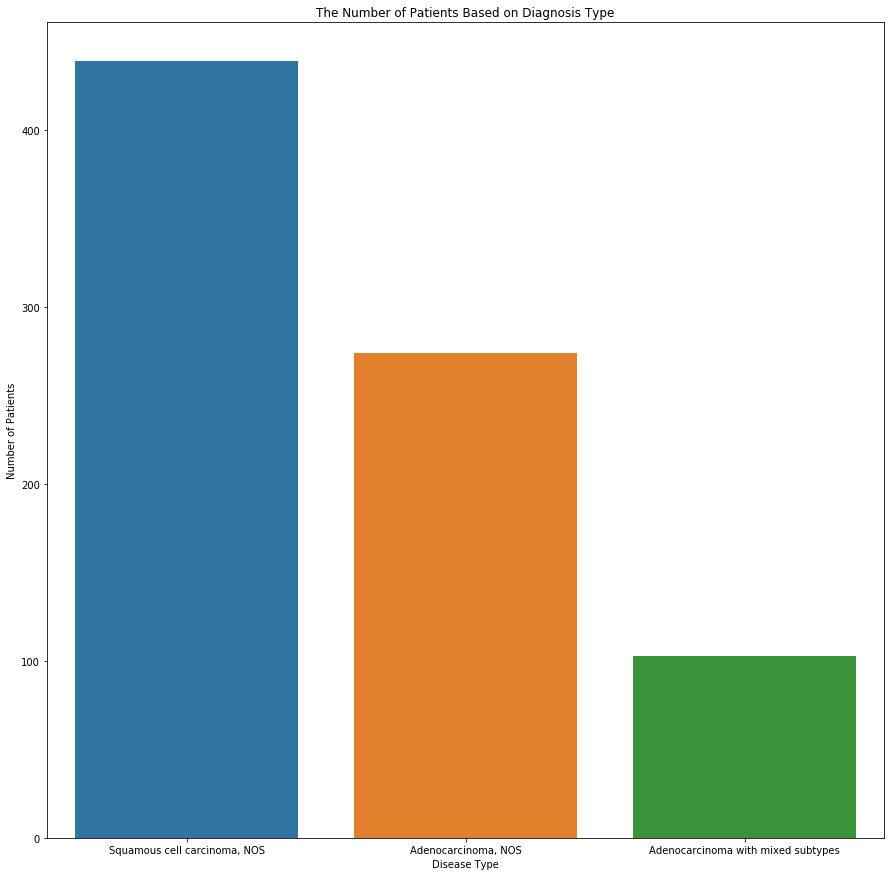

In [369]:
#Patients by disease type
plt.figure(figsize=(15,15))
lung_cancer_patients['Primary Diagnosis'].value_counts()
x = lung_cancer_patients[(lung_cancer_patients['Primary Diagnosis'] == 'Squamous cell carcinoma, NOS') |
(lung_cancer_patients['Primary Diagnosis'] == 'Adenocarcinoma, NOS')| (lung_cancer_patients['Primary Diagnosis'] == 'Adenocarcinoma with mixed subtypes')]

ax = sns.countplot(x = 'Primary Diagnosis' ,data= x)
ax.set_title("The Number of Patients Based on Diagnosis Type")
ax.set_xlabel("Disease Type")
ax.set_ylabel("Number of Patients")

## Descriptive Statistics: Mutations 3.2

In [479]:
different_mutations['# SSM Affected Cases in Cohort'].describe()

count    570.000000
mean      29.154386
std       39.799507
min        1.000000
25%       11.000000
50%       19.000000
75%       35.000000
max      731.000000
Name: # SSM Affected Cases in Cohort, dtype: float64

In [480]:
#stats of # of mutated genes per gene
different_mutations['# Mutations'].describe()

count    570.000000
mean      30.050877
std       33.441855
min        1.000000
25%       11.000000
50%       20.000000
75%       37.000000
max      414.000000
Name: # Mutations, dtype: float64

In [481]:
different_mutations['# CNV Loss'].describe()

count    570.000000
mean      37.638596
std       26.797278
min        0.000000
25%       19.000000
50%       31.000000
75%       48.750000
max      252.000000
Name: # CNV Loss, dtype: float64

In [482]:
different_mutations['# CNV Gain'].describe()

count    570.000000
mean      62.942105
std       48.659194
min        0.000000
25%       32.000000
50%       49.000000
75%       74.750000
max      305.000000
Name: # CNV Gain, dtype: float64

Text(0, 0.5, 'Distribution of Mutations')

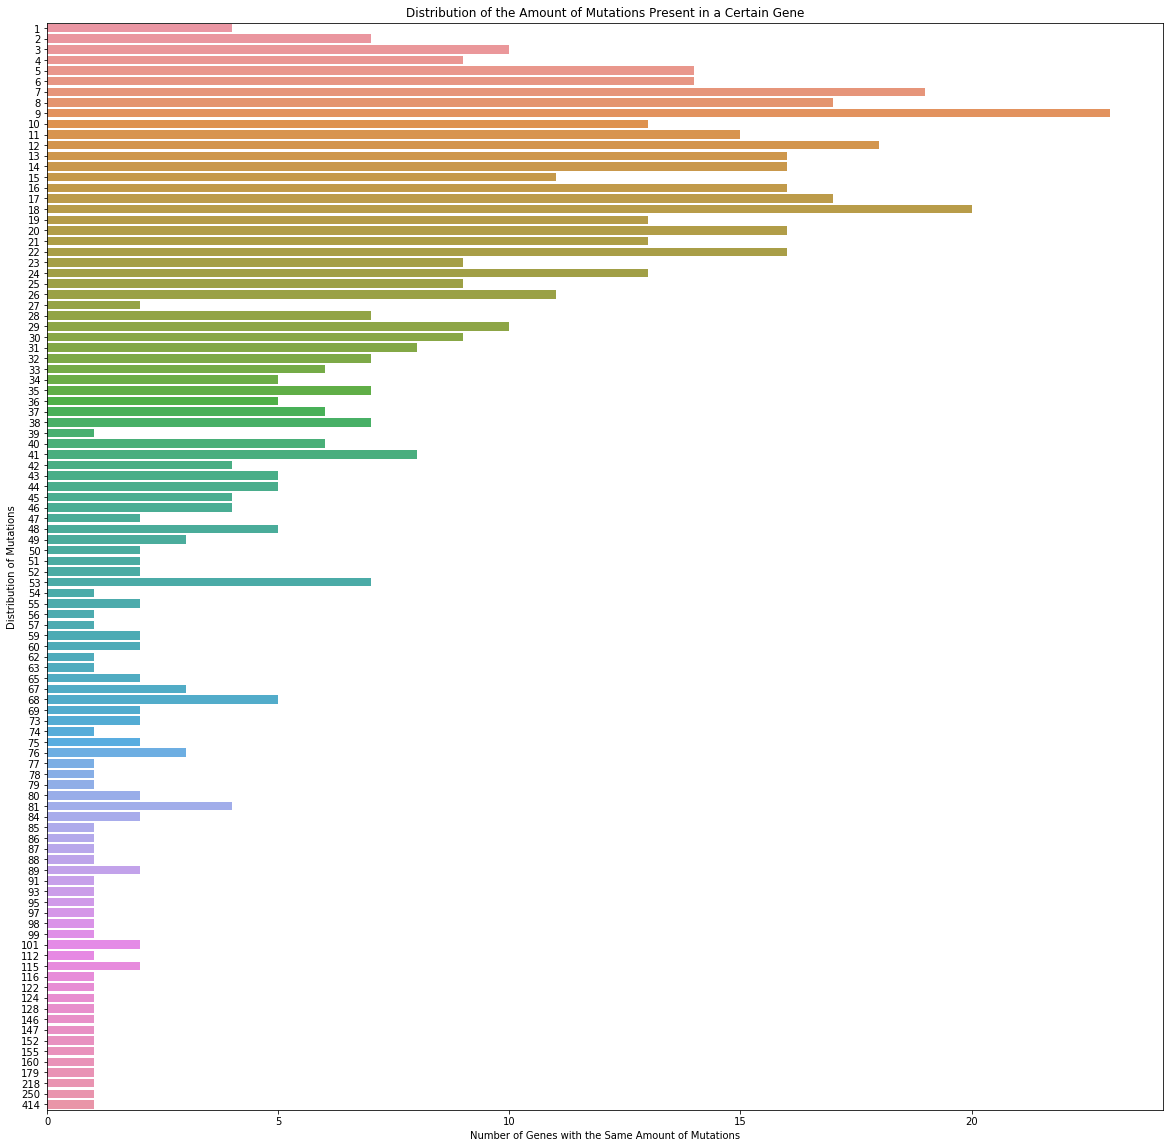

In [483]:
plt.figure(figsize=(20,20))

ax = sns.countplot(y = '# Mutations' ,data=different_mutations)
ax.set_title("Distribution of the Amount of Mutations Present in a Certain Gene")
ax.set_xlabel("Number of Genes with the Same Amount of Mutations")
ax.set_ylabel("Distribution of Mutations")

Text(0, 0.5, 'Distribution of Patients')

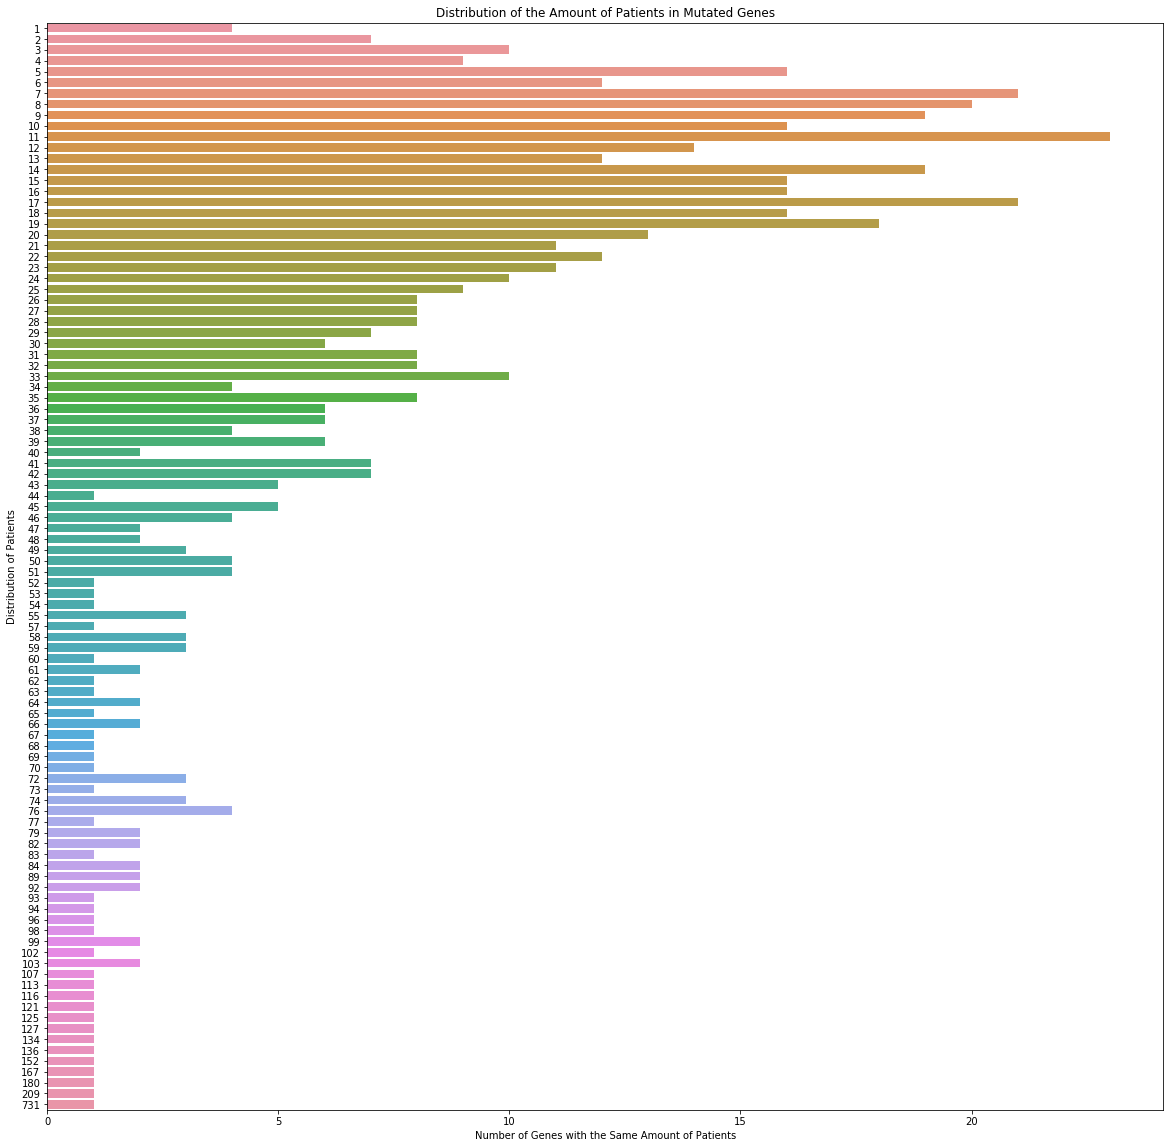

In [352]:
plt.figure(figsize=(20,20))

ax = sns.countplot(y = '# SSM Affected Cases in Cohort' ,data=different_mutations)
ax.set_title("Distribution of the Amount of Patients in Mutated Genes")
ax.set_xlabel("Number of Genes with the Same Amount of Patients")
ax.set_ylabel("Distribution of Patients")

Text(0, 0.5, 'The Distribution of CNV Gains')

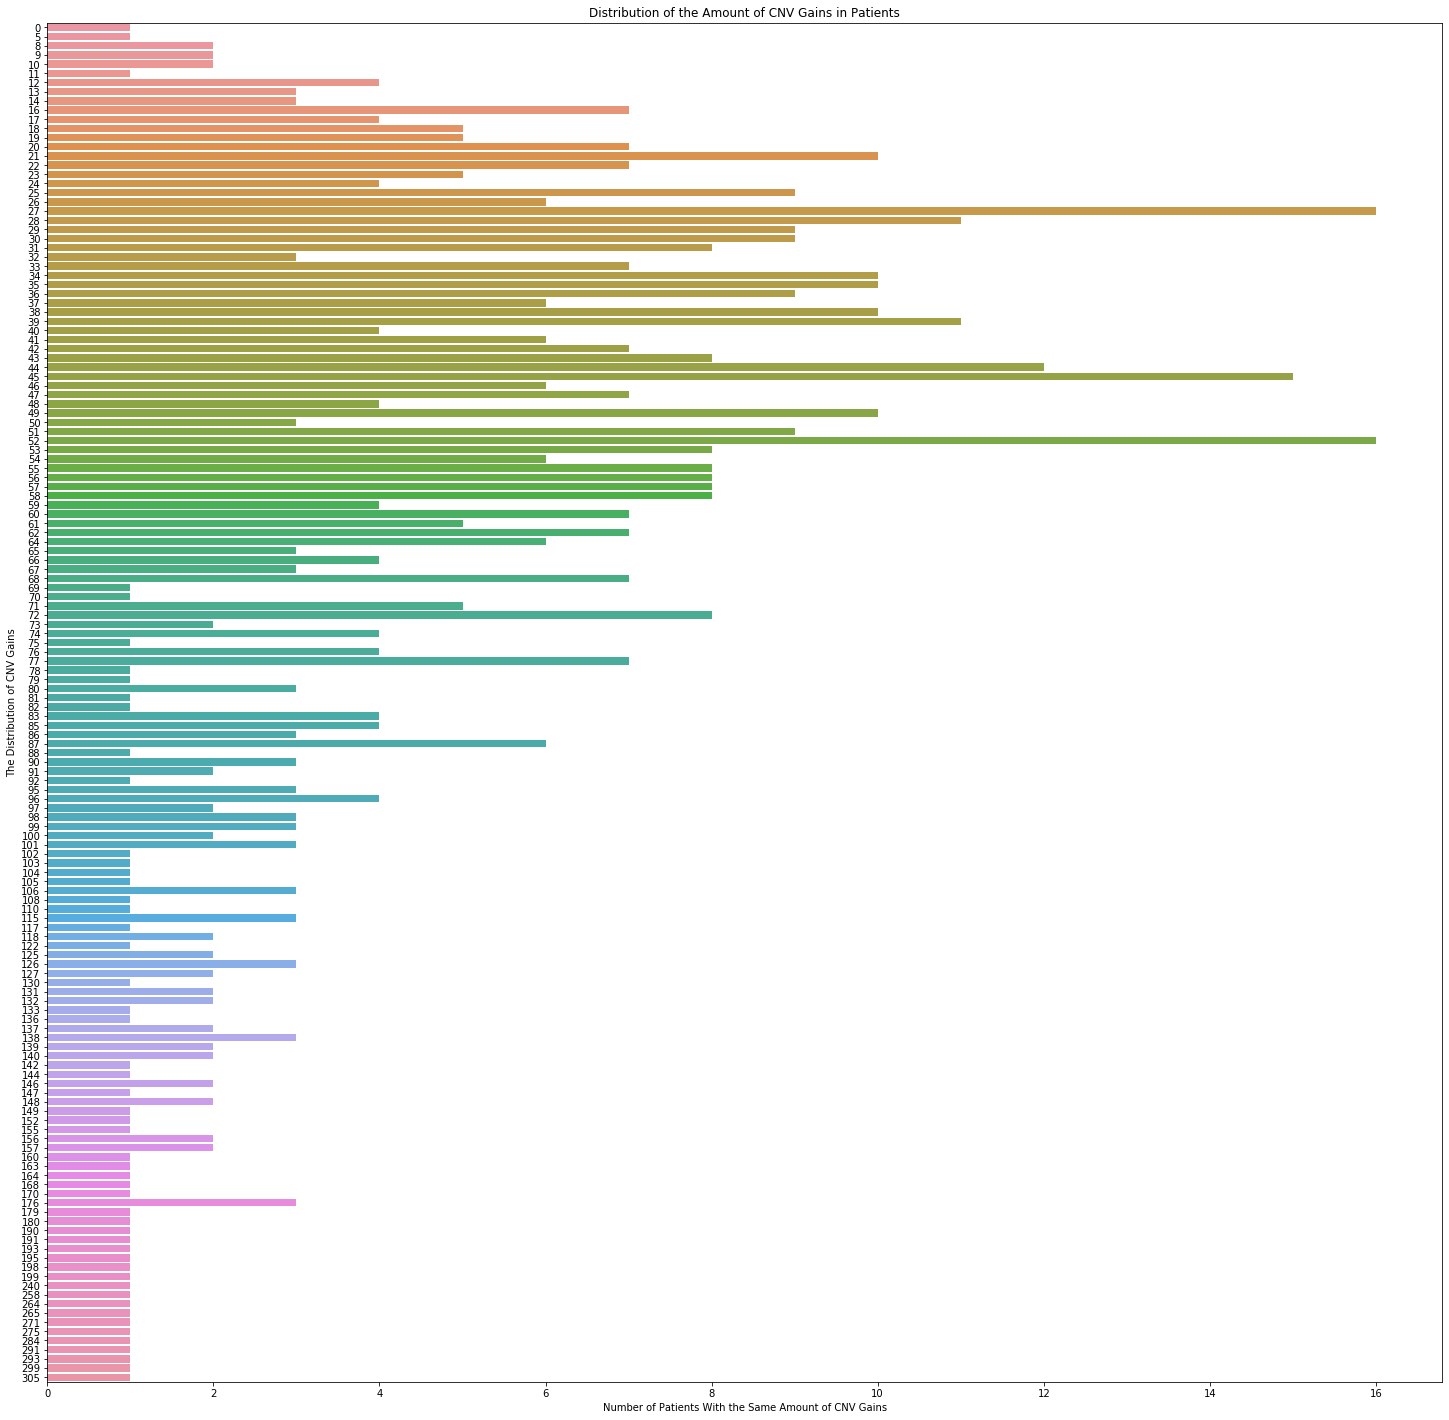

In [484]:
plt.figure(figsize=(25,25))

ax = sns.countplot(y = '# CNV Gain' ,data=different_mutations)
ax.set_title("Distribution of the Amount of CNV Gains in Patients")
ax.set_xlabel("Number of Patients With the Same Amount of CNV Gains")
ax.set_ylabel("The Distribution of CNV Gains")

Text(0, 0.5, 'The Distribution of CNV Loses')

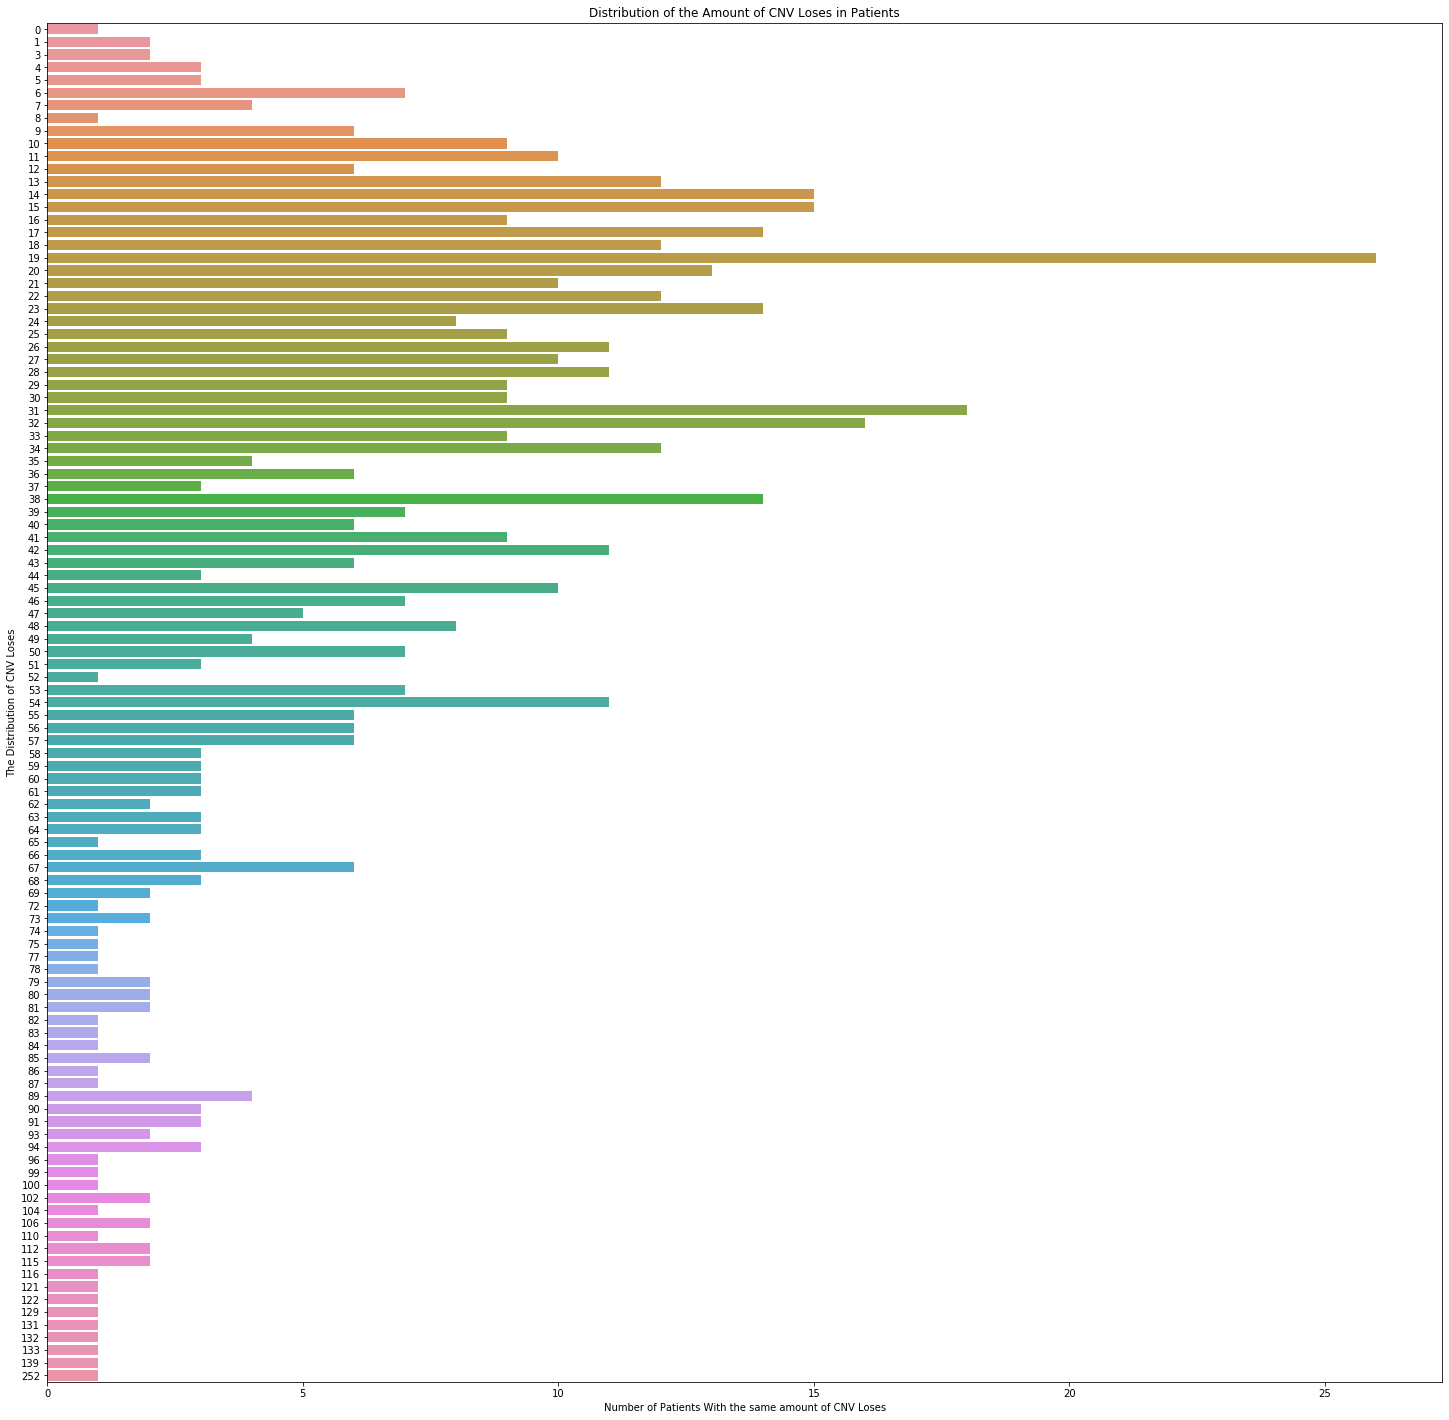

In [348]:
plt.figure(figsize=(25,25))

ax = sns.countplot(y = '# CNV Loss' ,data=different_mutations)
ax.set_title("Distribution of the Amount of CNV Loses in Patients")
ax.set_xlabel("Number of Patients With the same amount of CNV Loses")
ax.set_ylabel("The Distribution of CNV Loses")

## Data Analysis, Visualization, and Insights 4.0

## Data Analysis, Visualization, and Insights: Cases 4.1

Text(0.5, 1.0, 'Top 26 Patients with the Most Mutations')

<Figure size 1800x7200 with 0 Axes>

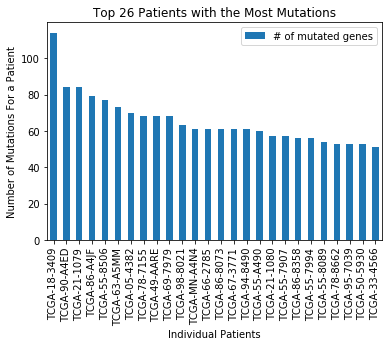

In [411]:
plt.figure(figsize=(25,100))
top_cases = lung_cancer_patients[lung_cancer_patients['# of mutated genes'] > 50]
top_cases = top_cases.sort_values(by = '# of mutated genes',ascending = False)
top_cases.plot(x='Case ID', y='# of mutated genes', kind ='bar')
plt.xlabel("Individual Patients")
plt.ylabel("Number of Mutations For a Patient")
plt.title("Top 26 Patients with the Most Mutations")

In [388]:
#Patients by race based on vitality

lung_cancer_patients_vitality_by_race = lung_cancer_patients.groupby(['Race'])
lung_cancer_patients_vitality_by_race = pd.DataFrame(lung_cancer_patients_vitality_by_race['Vital Status'].value_counts().reset_index(name = "Count"))

alt.Chart(lung_cancer_patients_vitality_by_race).mark_bar().encode(
    x=alt.X('Vital Status:O',axis=alt.Axis(title='')),
    y=alt.Y('Count:Q',axis=alt.Axis(title='Number of patients')),
    color='Vital Status:N',
    column=alt.Column('Race:N')
).properties(
    title='Number of Patients Vital Status Based on Race',width=90,height=90)

alt.Chart(...)

In [224]:
#Patients by gender based on vitality
lung_cancer_patients_vitality_by_gender = lung_cancer_patients.groupby(['Gender'])
lung_cancer_patients_vitality_by_gender = pd.DataFrame(lung_cancer_patients_vitality_by_gender['Vital Status'].value_counts().reset_index(name = "Count"))

alt.Chart(lung_cancer_patients_vitality_by_gender).mark_bar().encode(
    x=alt.X('Vital Status:O',axis=alt.Axis(title='')),
    y=alt.Y('Count:Q',axis=alt.Axis(title='Number of patients')),
    color='Vital Status:N',
    column=alt.Column('Gender:N')
).properties(
    title='Number of Patients Vital Status Based on Gender')

alt.Chart(...)

In [521]:
#Patients by Disease Type based on vitality
lung_cancer_patients_vitality_by_Disease_Type = lung_cancer_patients.groupby(['Disease Type'])
lung_cancer_patients_vitality_by_Disease_Type = pd.DataFrame(lung_cancer_patients_vitality_by_Disease_Type['Vital Status'].value_counts().reset_index(name = "Count"))

alt.Chart(lung_cancer_patients_vitality_by_Disease_Type).mark_bar().encode(
    x=alt.X('Vital Status:O',axis=alt.Axis(title='')),
    y=alt.Y('Count:Q',axis=alt.Axis(title='Number of patients')),
    color='Vital Status:N',
    column=alt.Column('Disease Type:N')
).properties(
    title='Number of Patients Vital Status Based on Disease Type',width=150,height=150)

alt.Chart(...)

In [517]:
#Patients by Age Group
conditions = [
(lung_cancer_patients['Age at diagnosis'] >= 25) & (lung_cancer_patients['Age at diagnosis']<= 54),
(lung_cancer_patients['Age at diagnosis'] >= 55) & (lung_cancer_patients['Age at diagnosis']<= 64),
(lung_cancer_patients['Age at diagnosis'] > 65),
]
choices = ['25-54','55-64','64_&_up']
lung_cancer_patients['age_group'] = np.select(conditions,choices,default = 'NaN')

lung_cancer_patients_vitality_by_Age = lung_cancer_patients.groupby(['age_group'])
lung_cancer_patients_vitality_by_Age = pd.DataFrame(lung_cancer_patients_vitality_by_Age['Vital Status'].value_counts().reset_index(name = "Count"))

Text(0.5, 0, 'Age Groups')

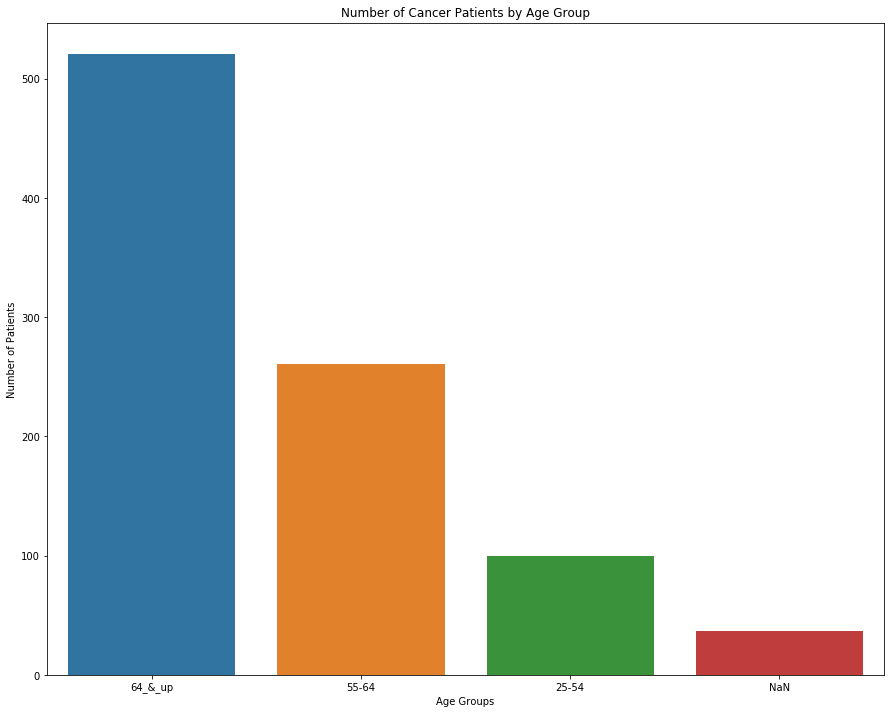

In [390]:
#Plot of Patients by Age Group
plt.figure(figsize=(15,12))

ax = sns.countplot(x = 'age_group' ,data= lung_cancer_patients, order = lung_cancer_patients['age_group'].value_counts().index)
ax.set_title("Number of Cancer Patients by Age Group")
ax.set_ylabel("Number of Patients")
ax.set_xlabel("Age Groups")

In [394]:
#Patients by age group based on vitality
alt.Chart(lung_cancer_patients_vitality_by_Age).mark_bar().encode(
    x=alt.X('Vital Status:O',axis=alt.Axis(title='')),
    y=alt.Y('Count:Q',axis=alt.Axis(title='Number of patients')),
    color='Vital Status:N',
    column=alt.Column('age_group:N')
).properties(
    title='Number of Patients Vital Status Separated into Age groups')

alt.Chart(...)

In [519]:
#Patients by Gene Group
conditions = [
(lung_cancer_patients['# of mutated genes'] >= 3) & (lung_cancer_patients['# of mutated genes']<= 9),
 (lung_cancer_patients['# of mutated genes'] >= 10) & (lung_cancer_patients['# of mutated genes']<= 15),   
(lung_cancer_patients['# of mutated genes'] >= 16) & (lung_cancer_patients['# of mutated genes']<= 21),
(lung_cancer_patients['# of mutated genes'] >= 22)
]
choices = ['3-9','10-15','16-21','22_&_up']
lung_cancer_patients['number of genes group'] = np.select(conditions,choices,default = 'NaN')

lung_cancer_patients_vitality_by_Gene = lung_cancer_patients.groupby(['number of genes group'])

lung_cancer_patients_vitality_by_Gene = pd.DataFrame(lung_cancer_patients_vitality_by_Gene['Vital Status'].value_counts().reset_index(name = "Count"))

Text(0.5, 0, 'Genes split by number of Genes into Groups')

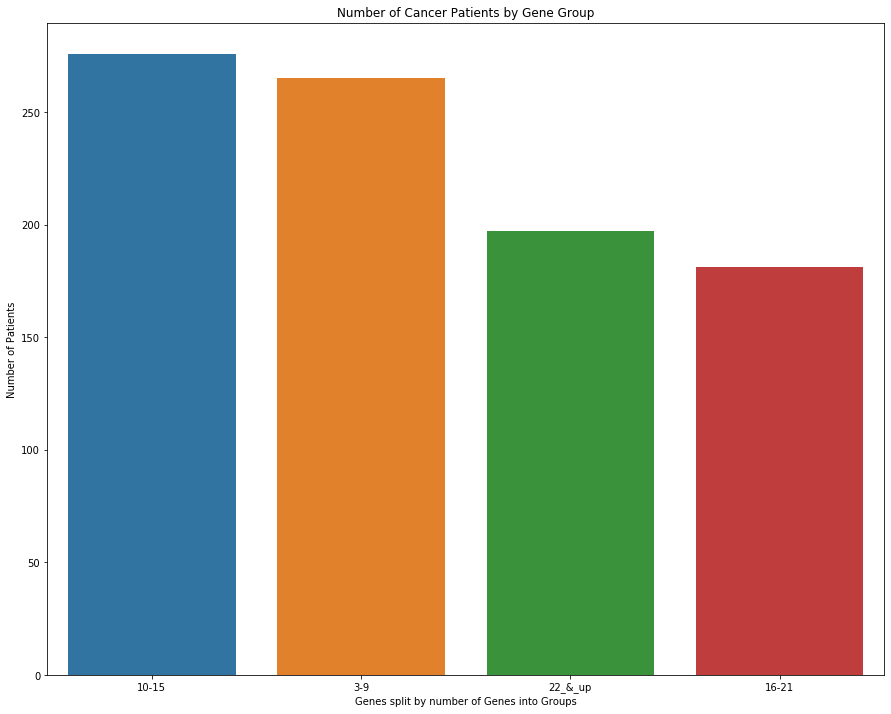

In [397]:
#Plot by Gene Group
plt.figure(figsize=(15,12))

ax = sns.countplot(x = 'number of genes group' ,data= lung_cancer_patients, order = lung_cancer_patients['number of genes group'].value_counts().index)
ax.set_title("Number of Cancer Patients by Gene Group")
ax.set_ylabel("Number of Patients")
ax.set_xlabel("Genes split by number of Genes into Groups")

In [398]:
#Patients by Gene Group based on vitality
alt.Chart(lung_cancer_patients_vitality_by_Gene).mark_bar().encode(
    x=alt.X('Vital Status:O',axis=alt.Axis(title='')),
    y=alt.Y('Count:Q',axis=alt.Axis(title='Number of patients')),
    color='Vital Status:N',
    column=alt.Column('number of genes group:N')
).properties(
    title='Number of Patients Vital Status Separated into Gene groups')

alt.Chart(...)

In [518]:
lung_cancer_patients_number_of_genes_by_Age_group = lung_cancer_patients.groupby(['age_group'])
lung_cancer_patients_number_of_genes_by_Age_group = pd.DataFrame(lung_cancer_patients_number_of_genes_by_Age_group['number of genes group'].value_counts().reset_index(name = "Count"))

In [460]:
#Patients by Gene Group based on vitality
alt.Chart(lung_cancer_patients_number_of_genes_by_Age_group).mark_bar().encode(
    x=alt.X('age_group:O',axis=alt.Axis(title='')),
    y=alt.Y('Count:Q',axis=alt.Axis(title='Number of patients')),
    color='age_group:N',
    column=alt.Column('number of genes group:N')
).properties(
    title='Number of Patients Age Groups Separated into Gene groups')

alt.Chart(...)

## Data Analysis, Visualization, and Insights: Mutation 4.2

Text(0.5, 1.0, 'Top 26 Genes with the Most Unique Mutations')

<Figure size 1080x1080 with 0 Axes>

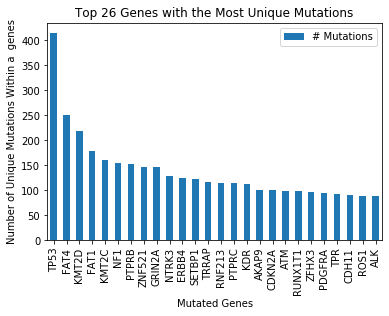

In [531]:
plt.figure(figsize=(15,15))
top_mutations = different_mutations[different_mutations['# Mutations'] > 88]
top_mutations = top_mutations.sort_values(by = '# Mutations',ascending = False)
top_mutations.plot(x='Symbol', y='# Mutations', kind ='bar')
plt.xlabel("Mutated Genes")
plt.ylabel("Number of Unique Mutations Within a  genes")
plt.title("Top 26 Genes with the Most Unique Mutations")

Text(0.5, 1.0, 'Top 26 Mutated Genes with the Most Patients in Lung Cancer Cohort')

<Figure size 1080x1080 with 0 Axes>

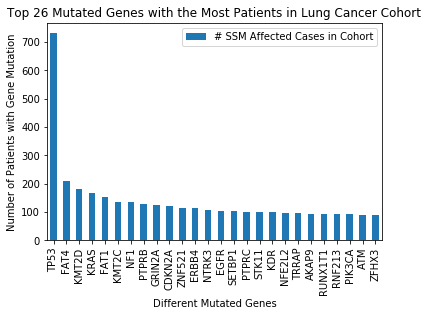

In [487]:
plt.figure(figsize=(15,15))
top_affected_gene =different_mutations[different_mutations['# SSM Affected Cases in Cohort'] > 88]
top_affected_gene = top_affected_gene.sort_values(by = '# SSM Affected Cases in Cohort',ascending = False)
top_affected_gene.plot(x='Symbol', y='# SSM Affected Cases in Cohort', kind ='bar')
plt.xlabel("Different Mutated Genes")
plt.ylabel("Number of Patients with Gene Mutation")
plt.title("Top 26 Mutated Genes with the Most Patients in Lung Cancer Cohort")

Text(0.5, 1.0, 'Top 25 Genes with the Most CNV Loss Observation in 1008 Patients')

<Figure size 1080x1080 with 0 Axes>

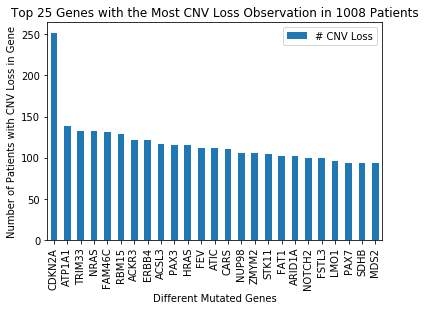

In [486]:
plt.figure(figsize=(15,15))
top_CNV_Loss = different_mutations[different_mutations['# CNV Loss'] > 93]
top_CNV_Loss = top_CNV_Loss.sort_values(by = '# CNV Loss',ascending = False)
top_CNV_Loss.plot(x='Symbol', y='# CNV Loss', kind ='bar')
plt.xlabel("Different Mutated Genes")
plt.ylabel("Number of Patients with CNV Loss in Gene")
plt.title("Top 25 Genes with the Most CNV Loss Observation in 1008 Patients")

Text(0.5, 1.0, 'Top 26 Genes with the Most CNV Gain Observation in 1008 Patients')

<Figure size 1080x1080 with 0 Axes>

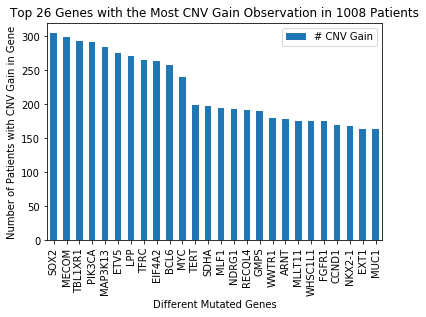

In [488]:
plt.figure(figsize=(15,15))
top_CNV_Gain = different_mutations[different_mutations['# CNV Gain'] > 160]
top_CNV_Gain = top_CNV_Gain.sort_values(by = '# CNV Gain',ascending = False)

top_CNV_Gain.plot(x='Symbol', y='# CNV Gain', kind ='bar')
plt.xlabel("Different Mutated Genes")
plt.ylabel("Number of Patients with CNV Gain in Gene")
plt.title("Top 26 Genes with the Most CNV Gain Observation in 1008 Patients")

## Machine learning application 5

In [190]:
dataset = pd.read_csv('lung_cancer_final.csv')

dataset

,Patients,BRAF,PTPRB,ABL2,ARHGAP26,ERCC5,PDGFRA,IL21R,ALK,FGFR4,...,POU2AF1,FEV,SDHAF2,LHFP,CEBPA,CHIC2,RAP1GDS1,CDK6,PTK6,Is_lung_cancer
0,patient_1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,patient_2,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,patient_3,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,patient_4,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,patient_5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,patient_196,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,patient_197,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,patient_198,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
198,patient_199,1,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [212]:
#input columns
dataset.iloc[0:201,1:569]

,BRAF,PTPRB,ABL2,ARHGAP26,ERCC5,PDGFRA,IL21R,ALK,FGFR4,BRIP1,...,CREB3L2,POU2AF1,FEV,SDHAF2,LHFP,CEBPA,CHIC2,RAP1GDS1,CDK6,PTK6
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
198,1,1,0,0,0,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,0


In [213]:
x = dataset.iloc[0:201,1:569].values
y = dataset.iloc[0:201,569].values  

In [262]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense

In [601]:
#splitting dataset into traing set and test set
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [602]:
#creates artificial neural network
classifier = Sequential()

In [603]:
#adds input layer and first hidden layer
classifier.add(Dense(kernel_initializer = 'uniform',activation = 'relu',input_dim = 568,units = 100))

In [604]:
#adds second hidden layer
classifier.add(Dense(kernel_initializer = 'uniform',activation = 'relu',units = 100))

In [605]:
#adds output layer
classifier.add(Dense(kernel_initializer = 'uniform',activation = 'sigmoid',units = 1))

In [606]:
#makes ANN
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [607]:
classifier.fit(x_train,y_train,batch_size = 10, epochs = 200)

Epoch 1/200
160/160 [==============================] - 0s 811us/step - loss: 0.6871 - accuracy: 0.6000
Epoch 2/200
160/160 [==============================] - 0s 168us/step - loss: 0.6139 - accuracy: 0.7188
Epoch 3/200
160/160 [==============================] - 0s 168us/step - loss: 0.4105 - accuracy: 0.9563
Epoch 4/200
160/160 [==============================] - 0s 224us/step - loss: 0.1554 - accuracy: 1.0000
Epoch 5/200
160/160 [==============================] - 0s 162us/step - loss: 0.0306 - accuracy: 1.0000
Epoch 6/200
160/160 [==============================] - 0s 157us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 7/200
160/160 [==============================] - 0s 220us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 8/200
160/160 [==============================] - 0s 189us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 9/200
160/160 [==============================] - 0s 176us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 10/200
160/160 [==============================] - 0s 231us/step - l

In [608]:
len(x_test)

40

In [609]:
x_test

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [613]:
#predicts the test set results
y_pred = classifier.predict(x_test)
y_pred

array([[9.95517313e-01],
       [1.78405672e-01],
       [1.07911415e-13],
       [9.91563916e-01],
       [3.57116759e-02],
       [2.42128968e-03],
       [8.62372518e-01],
       [2.94869542e-02],
       [1.89073384e-02],
       [2.89662808e-01],
       [7.90178776e-01],
       [7.19726086e-04],
       [8.20156201e-05],
       [8.41766596e-01],
       [7.97397888e-07],
       [8.52753878e-01],
       [9.99971032e-01],
       [1.35898590e-04],
       [9.99881268e-01],
       [3.79982591e-03],
       [1.02968386e-06],
       [1.33907250e-07],
       [9.95963514e-01],
       [3.11078074e-05],
       [1.14181876e-01],
       [3.56207283e-06],
       [5.95986843e-04],
       [7.07444415e-05],
       [5.01170754e-03],
       [9.99405921e-01],
       [9.93311882e-01],
       [9.01490450e-04],
       [3.34522218e-01],
       [1.67376516e-15],
       [1.84416771e-04],
       [9.97070372e-01],
       [1.20977893e-05],
       [9.99966025e-01],
       [4.35986549e-01],
       [2.06861167e-14]],

In [614]:
y_pred = (y_pred > 0.7)
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False]])

In [615]:
#gives confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[20,  2],
       [ 7, 11]], dtype=int64)

In [616]:
#accuracy_of_results
accuracy = (20+11)/40
accuracy

0.775

In [617]:
precision = 20/(20+7)
precision

0.7407407407407407

In [618]:
recall = 20/(20+2)
recall

0.9090909090909091